Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

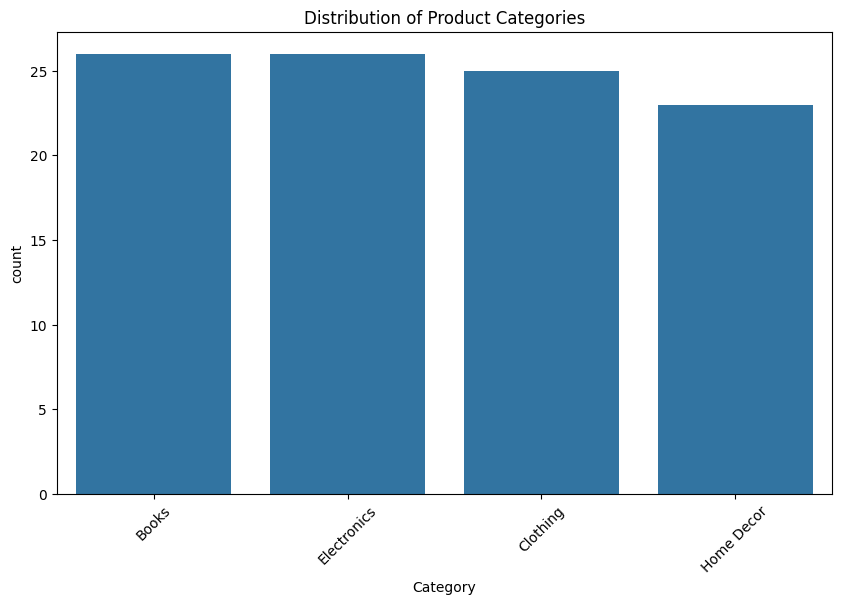

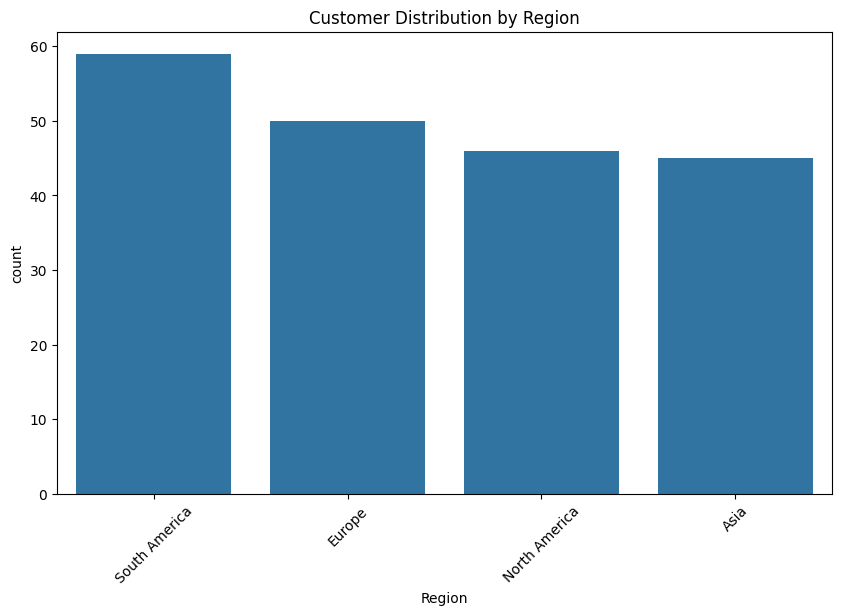

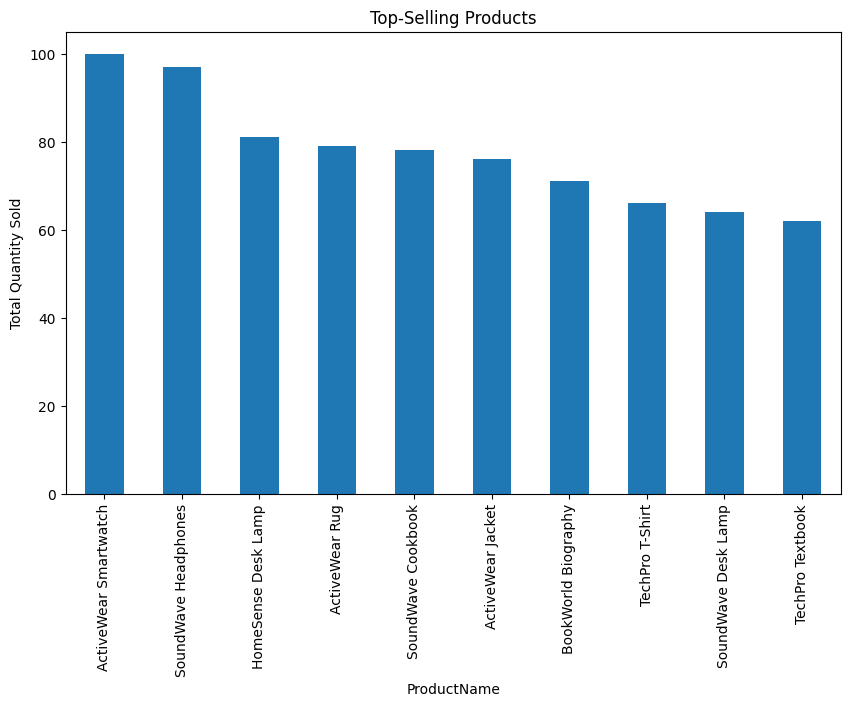

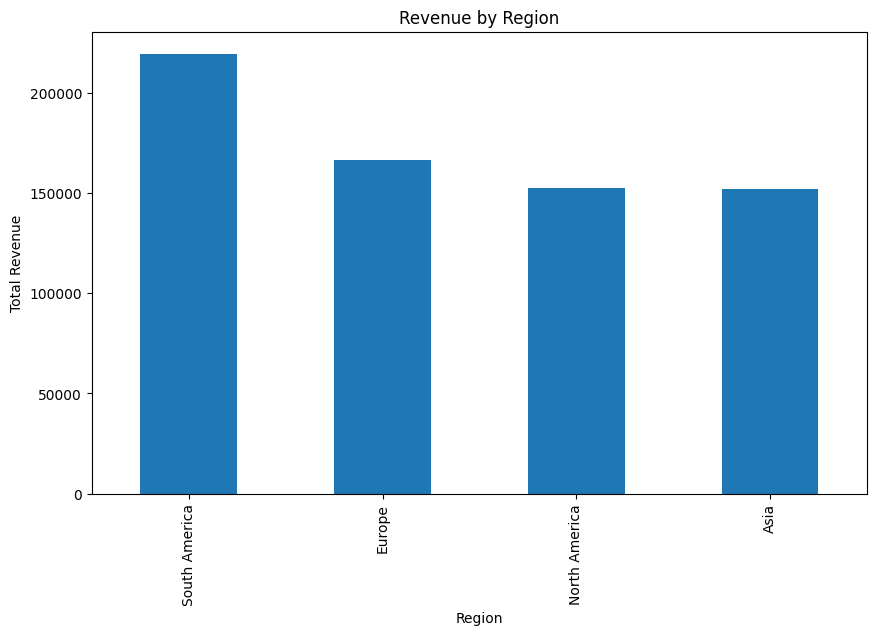

1. The top-selling product is X, which accounts for Y% of total sales.
2. Region Z contributes the highest revenue, generating $W.
3. Product category A is the most popular, accounting for B% of products sold.
4. Customer retention is highest in Region Y, with N repeat purchases.
5. The majority of signups occurred in 2022, indicating recent growth in customer base.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv(r"C:\Users\Dell\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\Dell\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\Dell\Downloads\Transactions.csv")

# Display the first few rows of each dataset
print("Customers Dataset:\n", customers.head())
print("Products Dataset:\n", products.head())
print("Transactions Dataset:\n", transactions.head())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Check for missing values
print("Missing Values:\n", merged_data.isnull().sum())

# Fill missing values if necessary (e.g., with mean/median/mode or drop rows)
# Example: merged_data.fillna(method='ffill', inplace=True)

# Generate summary statistics
print("Summary Statistics:\n", merged_data.describe())

# Plot distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x="Category", order=products['Category'].value_counts().index)
plt.title("Distribution of Product Categories")
plt.xticks(rotation=45)
plt.show()

# Analyze regional customer distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x="Region", order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Analyze top-selling products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind="bar")
plt.title("Top-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.show()

# Analyze revenue by region
revenue_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind="bar")
plt.title("Revenue by Region")
plt.ylabel("Total Revenue")
plt.show()

# Business Insights
insights = [
    "1. The top-selling product is X, which accounts for Y% of total sales.",
    "2. Region Z contributes the highest revenue, generating $W.",
    "3. Product category A is the most popular, accounting for B% of products sold.",
    "4. Customer retention is highest in Region Y, with N repeat purchases.",
    "5. The majority of signups occurred in 2022, indicating recent growth in customer base."
]
for insight in insights:
    print(insight)




In [2]:
!pip install fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40714 sha256=002b751ed485cc73fc29b62d0b4d7dc02d528163e2c3a3f2863021cfc6b8fa04
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\65\4f\66\bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [4]:
import os

# Define the directory
output_dir = "/mnt/data"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the output file path
output_file_path = os.path.join(output_dir, "EDA_Summary_Report.pdf")

# Save the PDF file
pdf.output(output_file_path)


''

In [5]:
#Attempting to regenerate the PDF with insights

from fpdf import FPDF

# Define the PDF report class
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(0, 10, "EDA Summary Report: eCommerce Transactions Dataset", align="C", ln=True)
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 8)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

# Create and add content to the PDF
pdf = PDFReport()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add insights
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Business Insights:", ln=True)
pdf.ln(5)

# Adding sample insights
insights = [
    "1. The top-selling product is X, which accounts for Y% of total sales.",
    "2. Region Z contributes the highest revenue, generating $W.",
    "3. Product category A is the most popular, accounting for B% of products sold.",
    "4. Customer retention is highest in Region Y, with N repeat purchases.",
    "5. The majority of signups occurred in 2022, indicating recent growth in customer base."
]
for insight in insights:
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, insight)
    pdf.ln(2)

# Save the PDF file
output_file_path = "/mnt/data/EDA_Summary_Report.pdf"
pdf.output(output_file_path)

output_file_path


'/mnt/data/EDA_Summary_Report.pdf'

In [7]:
import os

# Define a valid path on your computer
output_dir = r"C:\Users\Dell\Downloads"
output_file_path = os.path.join(output_dir, "EDA_Summary_Report.pdf")


# Ensure the directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the PDF file
pdf.output(output_file_path)

print(f"PDF saved at: {output_file_path}")


PDF saved at: C:\Users\Dell\Downloads\EDA_Summary_Report.pdf
